# Exploratory Data analysis

### Instalacja bibliotek

In [1]:
%pip install -r ../requirements.txt --quiet


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_columns', None)

### Wgranie pliku z danymi testowymi

In [3]:
df = pd.read_csv('../data/sales_ads_train.csv')
df.head()

,ID,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Rodzaj_paliwa,Emisja_CO2,Naped,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie
0,1,13900,PLN,Used,Renault,Grand Espace,Gr 2.0T 16V Expression,NaN,2005.0,213000.0,170.0,1998.0,Gasoline,232.0,Front wheels,Manual,minivan,5.0,blue,NaN,NaN,NaN,28/04/2021,"SŁONECZNA 1 - 99-300 Kutno, kutnowski, Łódzkie...","['ABS', 'Electric front windows', 'Drivers air..."
1,2,25900,PLN,Used,Renault,Megane,1.6 16V 110,III (2008-2016),2010.0,117089.0,110.0,1598.0,Gasoline,159.0,Front wheels,Manual,station_wagon,5.0,silver,NaN,NaN,16/06/2010,04/05/2021,"ul. Wiosenna 8 - 41-407 Imielin, Centrum (Polska)","['ABS', 'Electric front windows', 'Drivers air..."
2,3,35900,PLN,Used,Opel,Zafira,Tourer 1.6 CDTI ecoFLEX Start/Stop,C (2011-2019),2015.0,115600.0,136.0,1598.0,NaN,NaN,NaN,Manual,minivan,5.0,white,Denmark,NaN,NaN,03/05/2021,"Sianów, koszaliński, Zachodniopomorskie","['ABS', 'Electric front windows', 'Passengers ..."
3,4,5999,PLN,Used,Ford,Focus,1.6 TDCi FX Silver / Silver X,Mk2 (2004-2011),2007.0,218000.0,90.0,1560.0,Diesel,118.0,Front wheels,Manual,compact,5.0,blue,NaN,NaN,27/11/2007,02/05/2021,"Gdańsk, Pomorskie, Przymorze Wielkie","['ABS', 'Electric front windows', 'Drivers air..."
4,5,44800,PLN,Used,Toyota,Avensis,1.8,III (2009-),2013.0,NaN,NaN,1798.0,Gasoline,152.0,Front wheels,Manual,NaN,4.0,other,Poland,Yes,20/05/2013,02/05/2021,"Świdnik, świdnicki, Lubelskie","['ABS', 'Electric front windows', 'Drivers air..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135397 entries, 0 to 135396
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          135397 non-null  int64  
 1   Cena                        135397 non-null  int64  
 2   Waluta                      132021 non-null  object 
 3   Stan                        132075 non-null  object 
 4   Marka_pojazdu               132046 non-null  object 
 5   Model_pojazdu               132088 non-null  object 
 6   Wersja_pojazdu              87336 non-null   object 
 7   Generacja_pojazdu           93737 non-null   object 
 8   Rok_produkcji               131990 non-null  float64
 9   Przebieg_km                 131394 non-null  float64
 10  Moc_KM                      131664 non-null  float64
 11  Pojemnosc_cm3               130711 non-null  float64
 12  Rodzaj_paliwa               131987 non-null  object 
 13  Emisja_CO2    

### Procent braków danych w poszczególnych kolumnach:

In [5]:
missing_percent = df.isnull().mean() * 100
missing_percent.sort_values(ascending=False)

Pierwszy_wlasciciel           69.805092
Data_pierwszej_rejestracji    59.601025
Emisja_CO2                    56.057372
Kraj_pochodzenia              44.624327
Wersja_pojazdu                35.496355
Generacja_pojazdu             30.768776
Naped                          9.641277
Pojemnosc_cm3                  3.460933
Liczba_drzwi                   3.223114
Przebieg_km                    2.956491
Skrzynia_biegow                2.788097
Moc_KM                         2.757077
Kolor                          2.557664
Data_publikacji_oferty         2.547324
Rodzaj_paliwa                  2.518520
Rok_produkcji                  2.516304
Waluta                         2.493408
Typ_nadwozia                   2.480853
Marka_pojazdu                  2.474944
Lokalizacja_oferty             2.467558
Stan                           2.453526
Model_pojazdu                  2.443924
Wyposazenie                    2.402564
Cena                           0.000000
ID                             0.000000


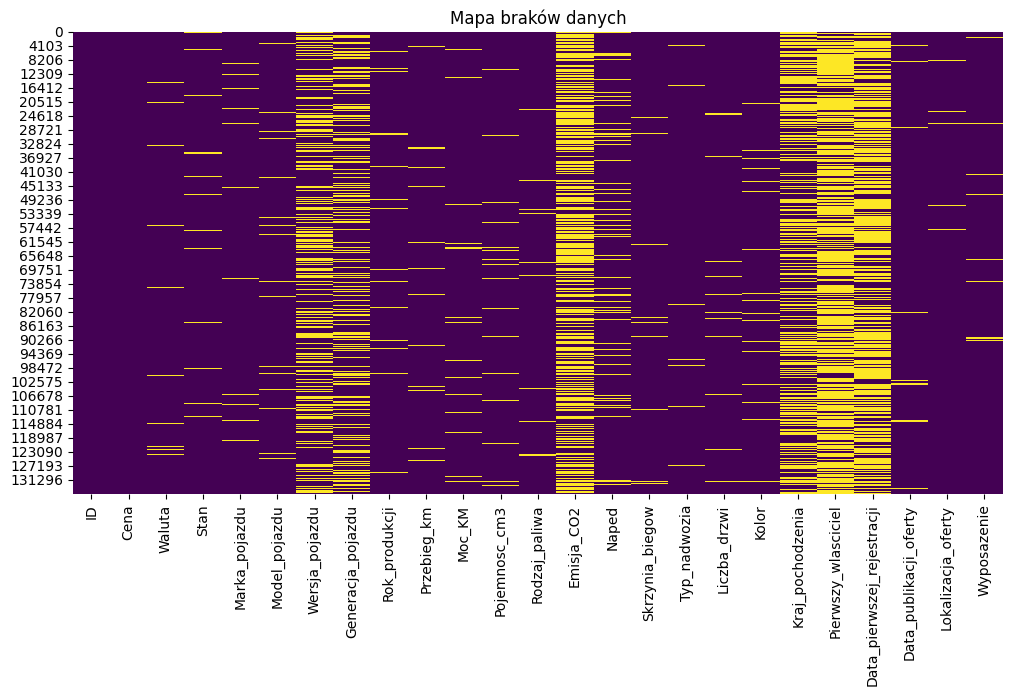

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa braków danych')
plt.show()

### Wnioski <br>
W trakcie analizy braków zauważyliśmy, że trzy kolumny miały ponad połowę brakujących wartości: **Pierwszy_wlasciciel (70%)**, **Data_pierwszej_rejestracji (60%)** i **Emisja_CO2 (57%)**. Rozważaliśmy ich usunięcie, ale w przypadku **Pierwszy_wlasciciel** interesowała nas wyłącznie wartość „YES”, dlatego zdecydowaliśmy się ją zachować, traktując brak informacji jako „brak deklaracji”. Dla pozostałych atrybutów, w których skala braków była mniejsza, uznaliśmy, że możliwe będzie zastosowanie standardowych metod postępowania z brakującymi danymi na dalszych etapach analizy.

### Sprawdzamy podstawowe statystyki dla każdej kolumny:

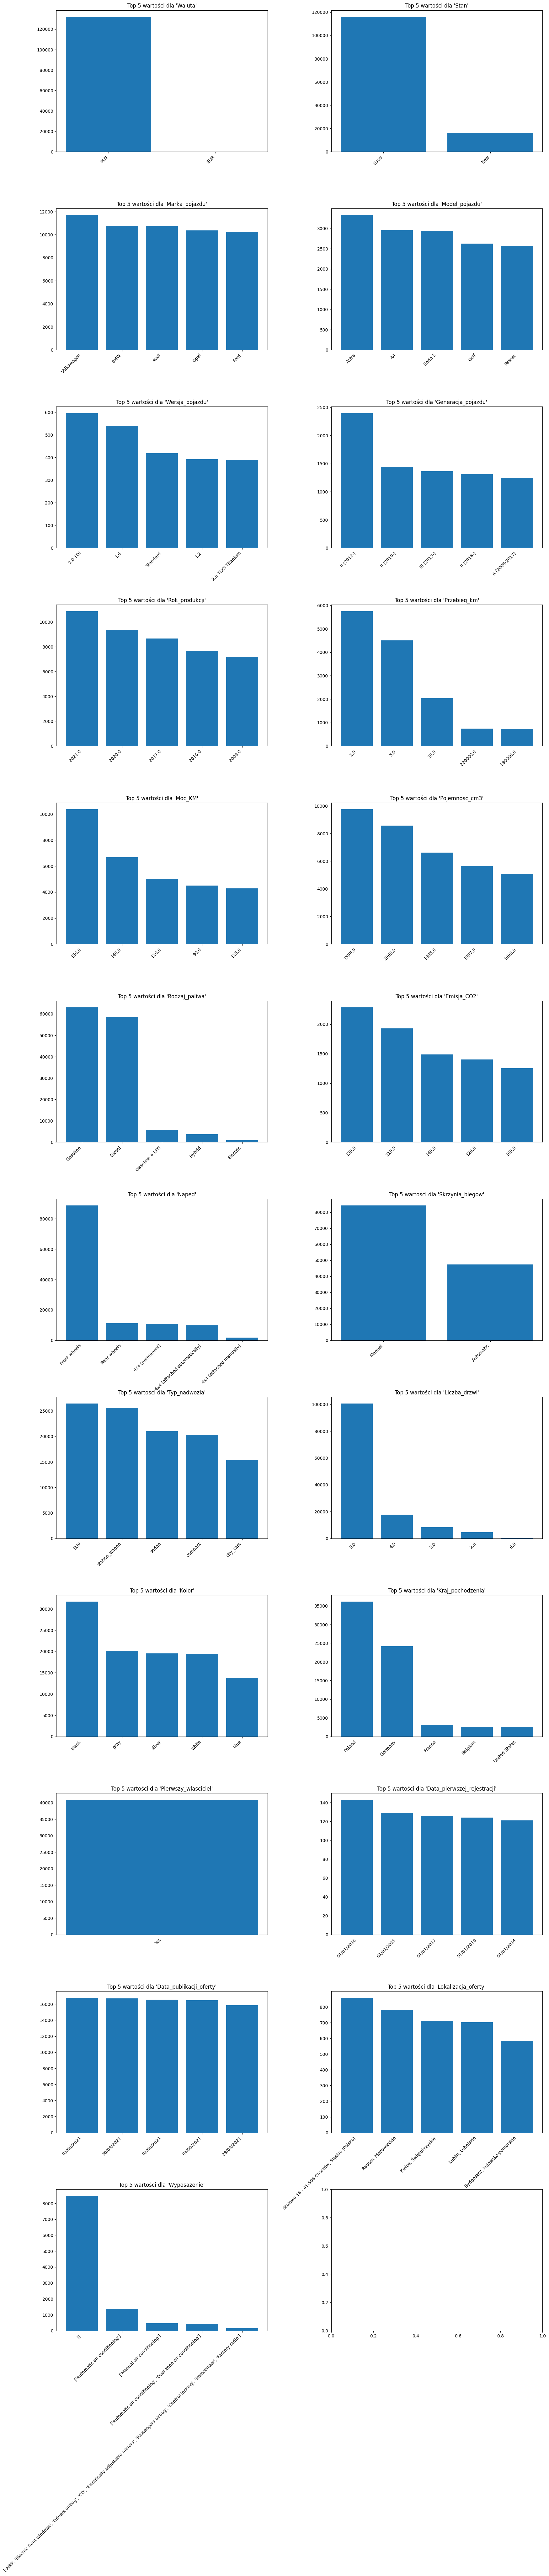

In [7]:
# plt.rcParams.update({
#     'axes.titlesize': 16,  # wielkość czcionki tytułów osi
#     'axes.labelsize': 14,  # wielkość czcionki etykiet osi
#     'xtick.labelsize': 12, # wielkość czcionki etykiet na osi X
#     'ytick.labelsize': 12, # wielkość czcionki etykiet na osi Y
#     'figure.dpi': 120      # rozdzielczość
# })

cols = df.drop(columns=['ID', 'Cena']).columns
n_plots_in_row = 2  
n_rows = (len(cols) + (n_plots_in_row - 1)) // n_plots_in_row

fig, axes = plt.subplots(n_rows, n_plots_in_row, figsize=(20, 8 * n_rows))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, col in enumerate(cols):
    row = i // n_plots_in_row
    col_pos = i % n_plots_in_row
    
    # Jeśli mamy tylko jeden wiersz subplotów
    ax = axes[row, col_pos] if n_rows > 1 else axes[col_pos]
    
    top_5 = df[col].value_counts().head(5)
    
    # Wykres słupkowy w kolorze niebieskim
    ax.bar(top_5.index.astype(str), top_5.values)
    
    ax.set_title(f"Top 5 wartości dla '{col}'")
    ax.tick_params(axis='x', rotation=45)
    for label in ax.get_xticklabels():
        label.set_ha('right')
        
    # Wyłączamy siatkę
    ax.grid(False)

plt.show()

In [8]:
df.describe()

,ID,Cena,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Emisja_CO2,Liczba_drzwi
count,135397.000000,1.353970e+05,131990.000000,1.313940e+05,131664.000000,130711.000000,5.949700e+04,131033.000000
mean,67699.000000,6.306938e+04,2012.089901,1.531563e+05,151.716696,1881.811753,3.363019e+05,4.635611
std,39085.891536,8.807748e+04,7.003557,3.421378e+06,77.386471,727.605417,8.199407e+07,0.780062
min,1.000000,5.850000e+02,1923.000000,1.000000e+00,1.000000,400.000000,1.000000e+00,1.000000
25%,33850.000000,1.780000e+04,2008.000000,5.300000e+04,105.000000,1461.000000,1.200000e+02,5.000000
50%,67699.000000,3.580000e+04,2013.000000,1.448635e+05,136.000000,1798.000000,1.400000e+02,5.000000
75%,101548.000000,7.599000e+04,2017.000000,2.060000e+05,173.000000,1997.000000,1.640000e+02,5.000000
max,135397.000000,6.999000e+06,2021.000000,1.111111e+09,1398.000000,8400.000000,2.000000e+10,55.000000


In [9]:
df.describe(include=['object', 'category'])

,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rodzaj_paliwa,Naped,Skrzynia_biegow,Typ_nadwozia,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie
count,132021,132075,132046,132088,87336,93737,131987,122343,131622,132038,131934,74977,40883,54699,131948,132056,132144
unique,2,2,102,1139,16014,558,8,5,2,9,14,34,1,7616,38,11920,114138
top,PLN,Used,Volkswagen,Astra,2.0 TDI,II (2012-),Gasoline,Front wheels,Manual,SUV,black,Poland,Yes,01/01/2016,03/05/2021,"Stalowa 16 - 41-506 Chorzów, Śląskie (Polska)",[]
freq,131856,115824,11692,3331,596,2396,63003,88699,84229,26419,31680,36122,40883,143,16775,857,8464


### Wnioski <br>
**Data_publikacji_oferty** i **Lokalizacja_oferty** mają bardzo dużo unikalnych wartości, co wprowadziłoby zbędny szum do analizy.<br>
**Generacja_pojazdu** i **Wersja_pojazdu** charakteryzują się dużą liczbą braków i wysoką zmiennością, co utrudnia ich interpretację.<br>


### Waluta

Chcemy ujednolicić walutę w jakiej przedstawiana jest cena do dalszej analizy. Z tego powodu odrzucamy rekordy z brakami w kolumnie 'Waluta' i przeliczamy EUR na PLN zgodnie z kursem z okresu, kiedy opublikowanych zostało najwięcej ofert:

In [11]:
conversion_rate = 4.5654
df = df.dropna(subset=['Waluta'])
mask = df['Waluta'] == 'EUR'
df.loc[mask, 'Cena'] = df.loc[mask, 'Cena'] * conversion_rate

df.drop(columns=['Waluta'], inplace=True)

### Analiza rozkładu cen samochodów

In [12]:
percentiles = [0.00, 0.01, 0.03, 0.05, 0.07, 0.1, 0.25, 0.5, 0.75, 0.90, 0.93, 0.95, 0.97, 0.99, 1]

for q in percentiles:
    threshold = df['Cena'].quantile(q)
    print(f"Granica dla {q*100:.0f} percentyla: {threshold:.2f}")

Granica dla 0 percentyla: 585.00
Granica dla 1 percentyla: 3200.00
Granica dla 3 percentyla: 5289.00
Granica dla 5 percentyla: 6900.00
Granica dla 7 percentyla: 7900.00
Granica dla 10 percentyla: 9800.00
Granica dla 25 percentyla: 17800.00
Granica dla 50 percentyla: 35900.00
Granica dla 75 percentyla: 76000.00
Granica dla 90 percentyla: 144256.00
Granica dla 93 percentyla: 172900.00
Granica dla 95 percentyla: 200000.00
Granica dla 97 percentyla: 254999.40
Granica dla 99 percentyla: 410980.00
Granica dla 100 percentyla: 6999000.00


In [13]:
threshold = df['Cena'].quantile(0.95)
df = df[df['Cena'] <= threshold]

### Wnioski <br>
Zbadaliśmy rozkład cen za pomocą wybranych percentyli (od 0% do 100%), co pozwoliło nam określić, gdzie znajdują się istotne skrajności w danych. Zauważyliśmy, że największy wzrost wartości ceny następuje od okolic 95. percentyla (ok. 200 tys. PLN) aż do maksymalnej ceny ~7 mln PLN, co wskazywało na obecność wyraźnie droższych ofert w górnej części rozkładu. W związku z tym podjęliśmy decyzję o ewentualnym ograniczeniu danych do 95. percentyla, aby skupić się na bardziej reprezentatywnej grupie ogłoszeń.

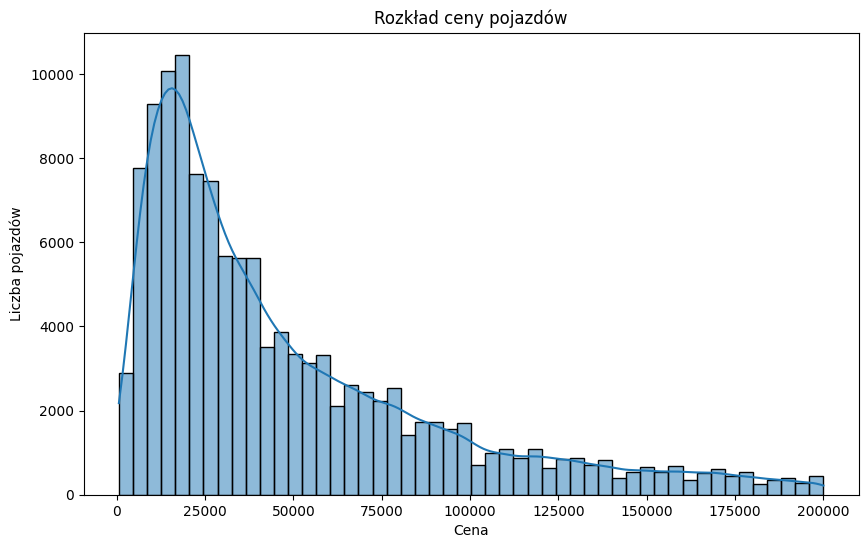

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Cena'], bins=50, kde=True)
plt.title('Rozkład ceny pojazdów')
plt.xlabel('Cena')
plt.ylabel('Liczba pojazdów')
plt.show()

Na powyższym histogramie widzimy, że większość ofert sprzedaży pojazdów skupia się w przedziale do ok. 50–60 tys. PLN. Jednocześnie pojawia się długi prawy „ogon”, co wskazuje na niewielki, ale istotny odsetek bardzo drogich samochodów.

### Korelacje cech ilościowych z ceną

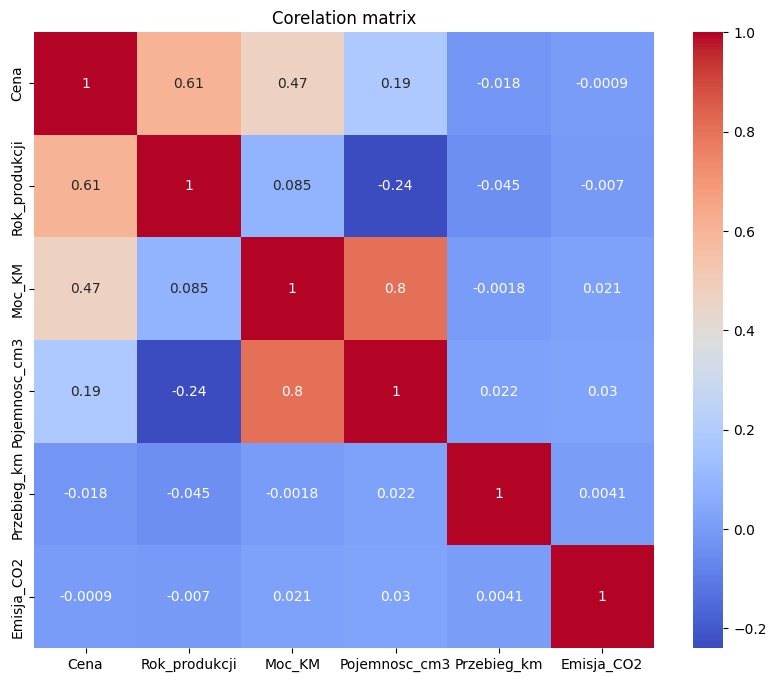

In [19]:
num_cols = ['Cena', 'Rok_produkcji', 'Moc_KM', 'Pojemnosc_cm3', 'Przebieg_km', 'Emisja_CO2']

plt.figure(figsize=(10,8))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Corelation matrix')
plt.show()

### Wnioski <br>
Na podstawie macierzy korelacji zauważyliśmy kilka istotnych zależności pomiędzy ceną a innymi cechami:
- **Rok_produkcji** wykazywał najsilniejszą dodatnią korelację z ceną (0,61), co sugeruje, że nowsze auta są zazwyczaj droższe.
- **Moc_KM** także umiarkowanie wpływała na cenę (0,47), natomiast **Pojemnosc_cm3** była już słabiej skorelowana (0,19).
- **Liczba_drzwi** i **Emisja_CO2** praktycznie nie korelowały z ceną, a **Przebieg_km** wykazywał jedynie minimalną ujemną zależność (–0,018), co może świadczyć o bardziej złożonych powiązaniach tej cechy z ceną lub wpływie innych zmiennych.
- Silny związek (0,8) między **Moc_KM** a **Pojemnoscia_cm3** potwierdza, że zazwyczaj większa pojemność silnika oznacza wyższą moc, co może być przydatne np. przy wypełnieniu braków danych w tych kolumnach. Warto też sprawdzić czy zależność Pojemnosc_cm3 – Cena nie wynika głównie z wyższej mocy silnika (czyli z korelacji Moc_KM – Cena).

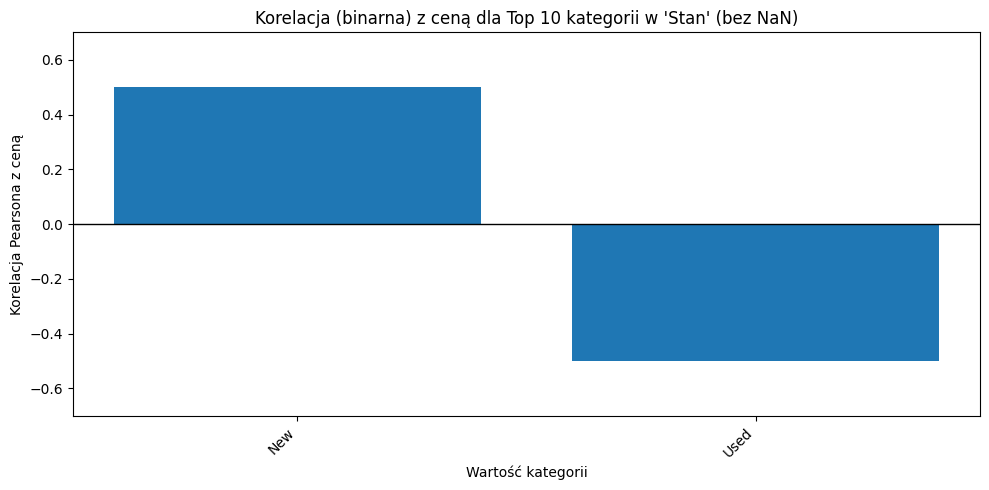


=== Stan ===
  New: 0.5004
  Used: -0.5004


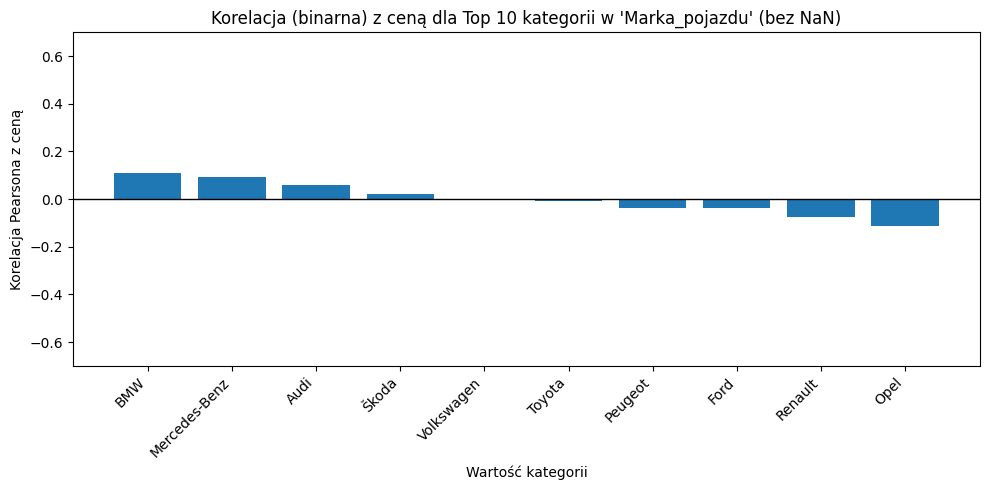


=== Marka_pojazdu ===
  BMW: 0.1107
  Mercedes-Benz: 0.0936
  Audi: 0.0593
  Škoda: 0.0202
  Volkswagen: -0.0046
  Toyota: -0.0078
  Peugeot: -0.0360
  Ford: -0.0369
  Renault: -0.0757
  Opel: -0.1138


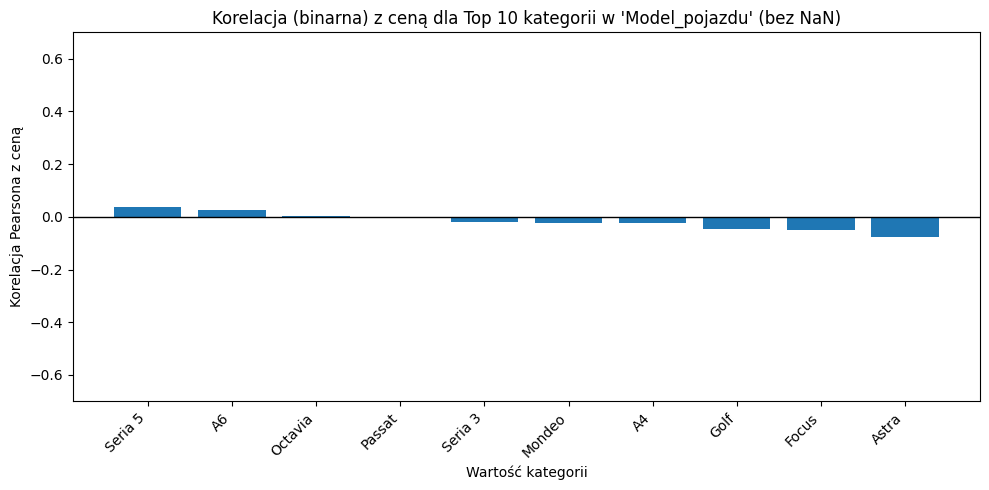


=== Model_pojazdu ===
  Seria 5: 0.0358
  A6: 0.0251
  Octavia: 0.0025
  Passat: -0.0001
  Seria 3: -0.0191
  Mondeo: -0.0240
  A4: -0.0252
  Golf: -0.0450
  Focus: -0.0505
  Astra: -0.0762


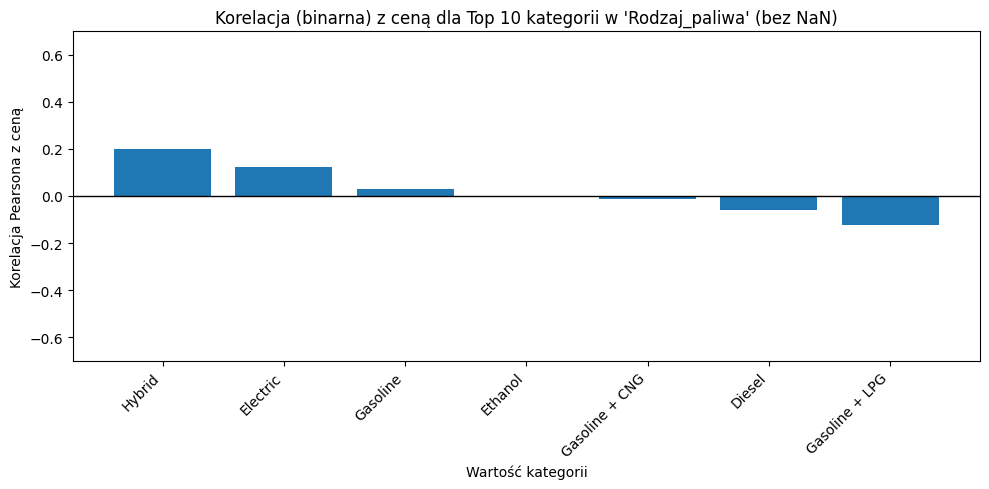


=== Rodzaj_paliwa ===
  Hybrid: 0.2001
  Electric: 0.1240
  Gasoline: 0.0281
  Ethanol: -0.0010
  Gasoline + CNG: -0.0116
  Diesel: -0.0595
  Gasoline + LPG: -0.1212


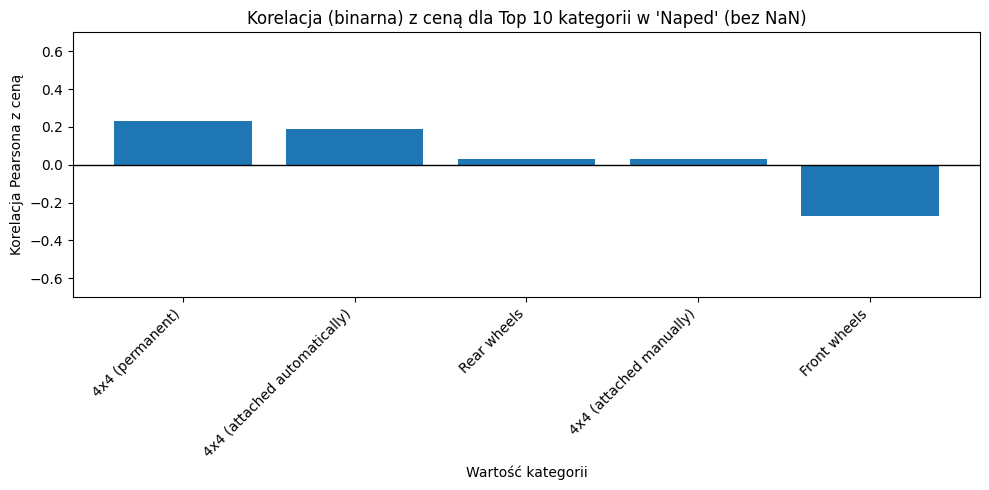


=== Naped ===
  4x4 (permanent): 0.2301
  4x4 (attached automatically): 0.1880
  Rear wheels: 0.0307
  4x4 (attached manually): 0.0299
  Front wheels: -0.2735


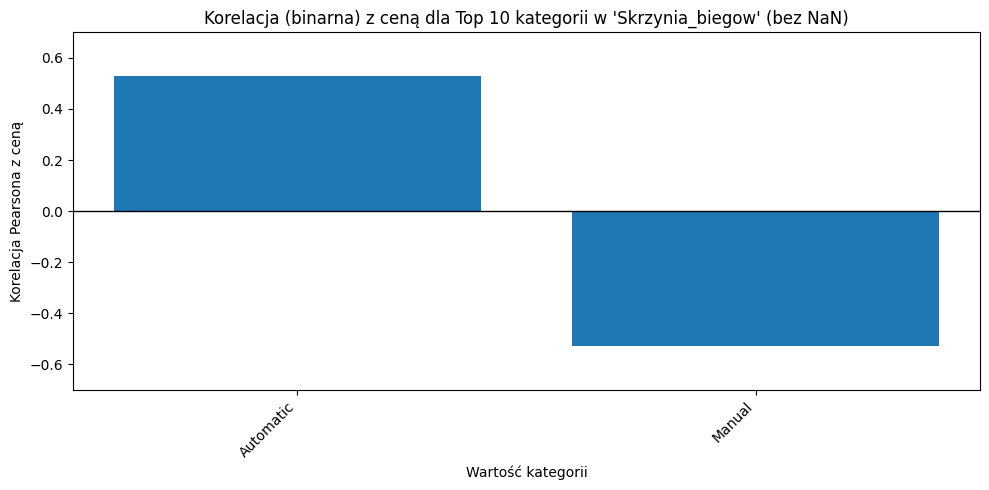


=== Skrzynia_biegow ===
  Automatic: 0.5290
  Manual: -0.5290


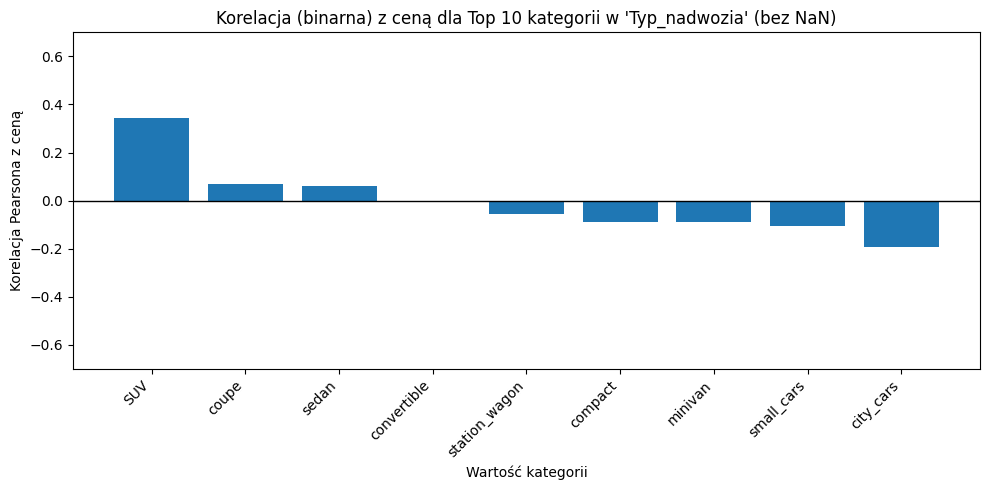


=== Typ_nadwozia ===
  SUV: 0.3422
  coupe: 0.0701
  sedan: 0.0626
  convertible: -0.0074
  station_wagon: -0.0566
  compact: -0.0902
  minivan: -0.0905
  small_cars: -0.1065
  city_cars: -0.1951


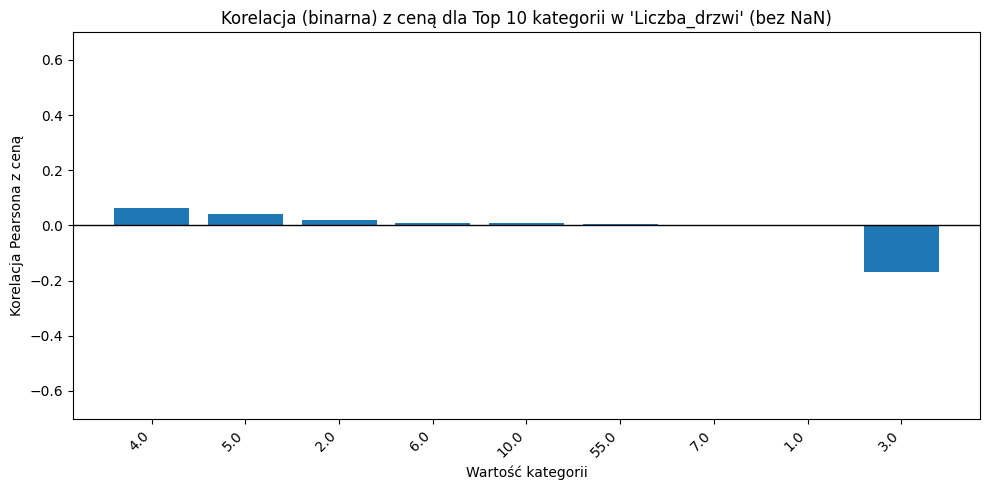


=== Liczba_drzwi ===
  4.0: 0.0638
  5.0: 0.0403
  2.0: 0.0200
  6.0: 0.0102
  10.0: 0.0082
  55.0: 0.0036
  7.0: -0.0006
  1.0: -0.0025
  3.0: -0.1698


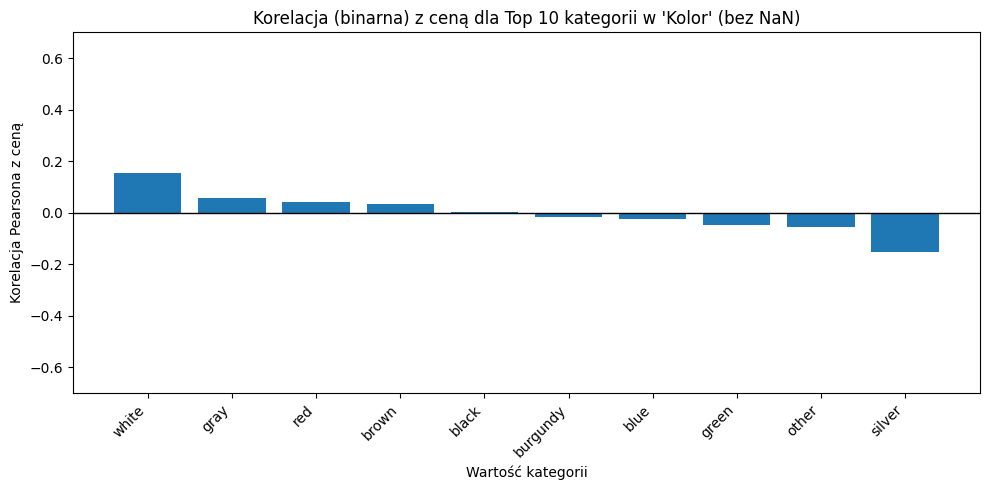


=== Kolor ===
  white: 0.1559
  gray: 0.0565
  red: 0.0411
  brown: 0.0358
  black: 0.0012
  burgundy: -0.0175
  blue: -0.0225
  green: -0.0487
  other: -0.0554
  silver: -0.1525


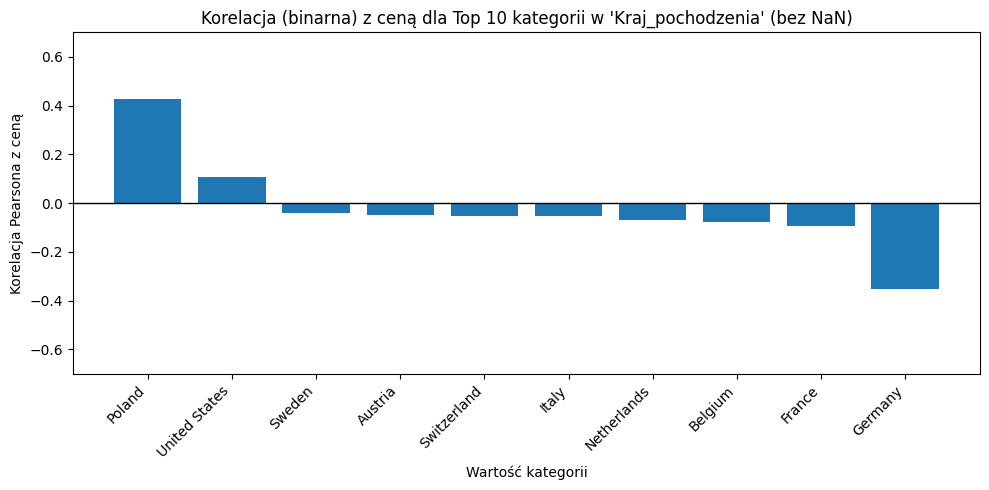


=== Kraj_pochodzenia ===
  Poland: 0.4255
  United States: 0.1050
  Sweden: -0.0401
  Austria: -0.0497
  Switzerland: -0.0520
  Italy: -0.0536
  Netherlands: -0.0680
  Belgium: -0.0771
  France: -0.0932
  Germany: -0.3538


In [16]:
cat_cols = [
    'Stan', 'Marka_pojazdu', 'Model_pojazdu',
    'Rodzaj_paliwa', 'Naped', 'Skrzynia_biegow', 'Typ_nadwozia', 'Liczba_drzwi',
    'Kolor', 'Kraj_pochodzenia',
]

for col in cat_cols:
    if col not in df.columns:
        continue
    
    df_notnull = df[df[col].notnull()]
    top_10_vals = df_notnull[col].value_counts(dropna=False).head(10).index
    
    corrs = []
    for cat_val in top_10_vals:
        dummy_series = (df_notnull[col] == cat_val).astype(int)

        corr_val = df_notnull['Cena'].corr(dummy_series)
        corrs.append((cat_val, corr_val))
    
    corrs_sorted = sorted(corrs, key=lambda x: x[1], reverse=True)
    cat_labels, cat_corrs = zip(*corrs_sorted)
    cat_labels_str = [str(lbl) for lbl in cat_labels]
    
    plt.figure(figsize=(10, 5))
    x_pos = np.arange(len(cat_labels_str))
    plt.bar(x_pos, cat_corrs)
    
    plt.xticks(x_pos, cat_labels_str, rotation=45, ha='right')
    plt.ylim(-0.7, 0.7)
    plt.axhline(y=0, color='black', linewidth=1)
    plt.title(f"Korelacja (binarna) z ceną dla Top 10 kategorii w '{col}' (bez NaN)")
    plt.xlabel("Wartość kategorii")
    plt.ylabel("Korelacja Pearsona z ceną")
    plt.tight_layout()
    plt.show()
    
    print(f"\n=== {col} ===")
    for label, val in corrs_sorted:
        print(f"  {label}: {val:.4f}")

### Wnioski <br>
**Stan** Samochody oznaczone jako „New” korelują dodatnio z ceną (wyższe ceny), a „Used” – ujemnie (niższe). Nowe auta intuicyjnie są zwykle droższe. <br>
**Marka_pojazdu** Marki premium (np. BMW, Mercedes, Audi) wykazały umiarkowaną dodatnią korelację z ceną, co sugeruje wyższe ceny pojazdów. <br>
**Rodzaj_paliwa** 'Hybrid' i 'Electric' wykazały dodatnią korelację z ceną, czyli te napędy zwykle występują w droższych autach (co często wiąże się z nowszą technologią). 'Diesel' czy 'Gasoline + LPG' są ujemnie skorelowane, co sugeruje, że pojazdy tego typu pojawiają się częściej w przedziałach niższych cen. <br>
**Naped** Napęd na tylną oś ('Rear wheels') i 4×4 ('4x4', szczególnie permanentny) wykazały dodatnie korelacje, co kojarzy się z droższymi modelami. Napęd na przód ('Front wheels') jest ujemnie skorelowany <br>
**Skrzynia_biegow** 'Automatic' ma wyraźną dodatnią korelację, a 'Manual' – ujemną.  <br>
**Typ_nadwozia** SUV ma stosunkowo wysoką korelację dodatnią z ceną – samochody z segmentu SUV są zwykle droższe. Nadwozia kompaktowe i miejskie (small_cars, city_cars) korelują ujemnie, co odzwierciedla niższe ceny w tym segmencie. <br>
**Liczba_drzwi** Wersje dwu- i trzydrzwiowe (często sportowe lub nieduże, miejskie auta) wypadły z korelacjami negatywnymi, wskazując na niższe ceny niż średnia.

### Analiza kolumny Wyposażenie

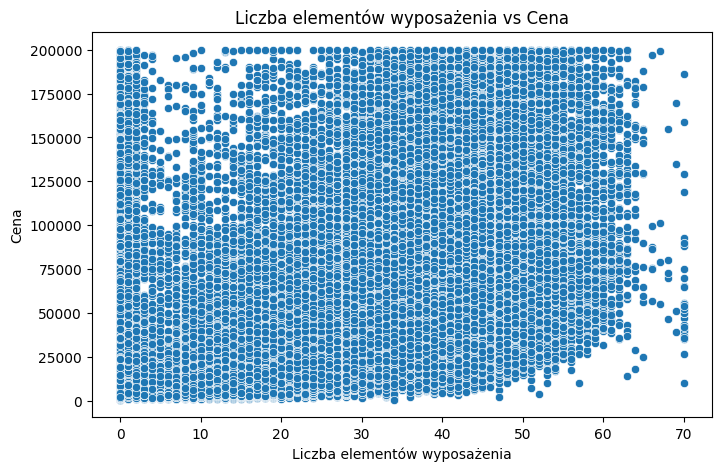

In [17]:
import ast

def convert_to_list(x):
    try:
        return ast.literal_eval(x)
    except Exception:
        return []

df['Wyposazenie_list'] = df['Wyposazenie'].apply(lambda x: convert_to_list(x) if pd.notnull(x) else [])

df['count_wyposazenie'] = df['Wyposazenie_list'].apply(len)

plt.figure(figsize=(8,5))
sns.scatterplot(x='count_wyposazenie', y='Cena', data=df)
plt.title("Liczba elementów wyposażenia vs Cena")
plt.xlabel("Liczba elementów wyposażenia")
plt.ylabel("Cena")
plt.show()

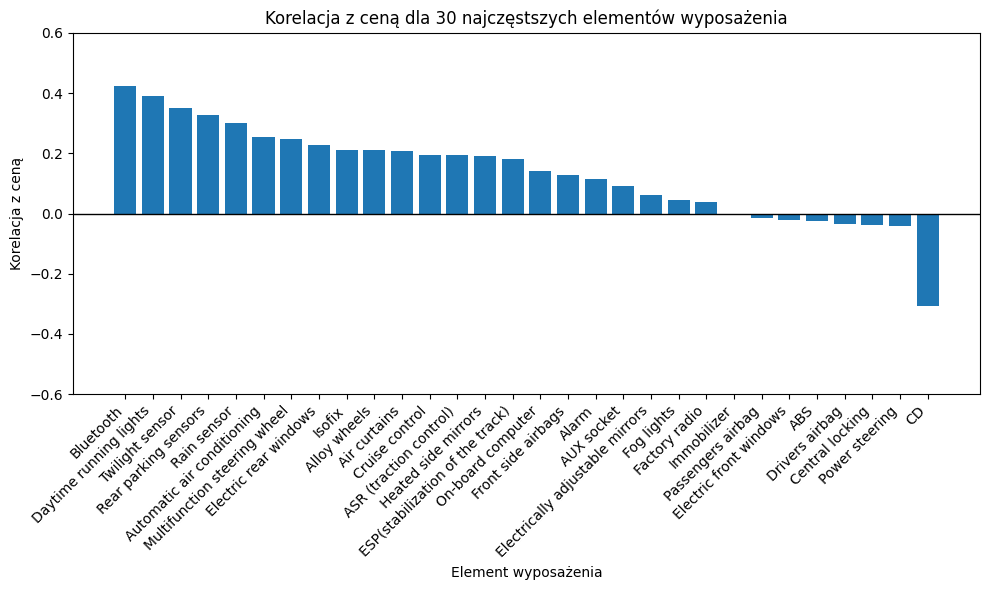

In [18]:
from collections import Counter

all_equipments = []
for equip_list in df['Wyposazenie_list']:
    all_equipments.extend(equip_list)

counter = Counter(all_equipments)
top_30_equipments = [item for item, _ in counter.most_common(30)]

corrs = []
for eq in top_30_equipments:
    dummy_series = df['Wyposazenie_list'].apply(lambda x: 1 if eq in x else 0)
    corr_val = df['Cena'].corr(dummy_series)
    corrs.append((eq, corr_val))

corrs_sorted = sorted(corrs, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
labels, values = zip(*corrs_sorted)
x_pos = np.arange(len(labels))

plt.bar(x_pos, values)
plt.xticks(x_pos, labels, rotation=45, ha='right')
plt.axhline(y=0, color='black', linewidth=1)
plt.ylim(-0.6, 0.6)
plt.title("Korelacja z ceną dla 30 najczęstszych elementów wyposażenia")
plt.xlabel("Element wyposażenia")
plt.ylabel("Korelacja z ceną")
plt.tight_layout()
plt.show()

### Wnioski <br>
Analiza wyposażenia sugeruje, że bogatsza lista dodatków (szczególnie nowoczesnych, jak zaawansowane systemy bezpieczeństwa czy elektryczne fotele) częściej pojawia się w droższych samochodach, co przekłada się na dodatnią korelację globalną. Jednocześnie rozrzut punktów na wykresie rozproszenia jest duży, więc samo bogactwo wyposażenia nie determinuje ceny – wpływa na nią wiele innych cech (np. marka, rocznik, stan). W rezultacie możemy uznać, że wyposażenie bywa ważnym, ale nie wyłącznym czynnikiem kształtującym wartość auta.

## Podsumowanie

#### Rozkład i jakość danych <br>
Zbiór obejmuje ponad sto tysięcy rekordów, jednak w kilku kolumnach (m.in. **Pierwszy_wlasciciel**, **Emisja_CO2**, **Data_pierwszej_rejestracji**) wystąpiło ponad 50% braków. Pozostałe cechy mają akceptowalny poziom braków, co pozwala na standardowe metody oczyszczania (np. imputację). Cena (zmienna docelowa) ma długi prawy ogon, wskazując na relatywnie niewielką, lecz bardzo drogą grupę pojazdów.

#### Zmienne liczbowe <br>
**Rok_produkcji** i **Moc_KM** wykazały względnie silniejszą korelację z ceną, co czyni je istotnymi w dalszym modelowaniu. Z kolei pojemność silnika (**Pojemnosc_cm3**) wydawała się ważna tylko w zestawieniu z mocą (silna współliniowość).
**Przebieg_km** nie ujawnił silnego związku liniowego z ceną.

#### Zmienne kategoryczne <br>
**Stan**, **Marka_pojazdu**, **Rodzaj_paliwa**, **Naped**, **Skrzynia_biegow** i **Typ_nadwozia** istotnie różnicują przedziały cen. Niektóre kategorie (np. marki premium, napęd 4×4, skrzynia automatyczna) są wyraźnie powiązane z wyższymi cenami.
Mniej przejrzyste okazały się zmienne o dużej liczbie kategorii (np. **Model_pojazdu**) albo te z dużym odsetkiem braków (**Kraj_pochodzenia**, **Pierwszy_wlasciciel**).

#### Wyposażenie <br>
Całkowita liczba dodatków ma słabą, lecz dodatnią korelację z ceną: pojazdy z bogatszym wyposażeniem często trafiają do wyższych półek cenowych. Na poziomie poszczególnych elementów (Top 30) widać, że nowoczesne systemy (np. zaawansowane multimedia, funkcje bezpieczeństwa) silniej łączą się z wyższymi cenami niż standardowe czy przestarzałe rozwiązania (CD).